In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, random_state=101)

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100,)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [6]:
class SimpleLinearRegression():
    """
    Simple Linear Regression.
    Using Ordinary Least Square method
    (only for single featured X.  i.e., X.shape = (n,1))
    
    Parameters
    ----------
    fit_intercept : boolean, optional, default True
        whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (e.g. data is expected to be already centered).
        
    copy_X : boolean, optional, default True
        If True, X will be copied; else, it may be overwritten.


    Attributes
    ----------
    coef_ : array, shape (n_features, ) or (n_targets, n_features)
        Estimated coefficients for the linear regression problem.
        If multiple targets are passed during the fit (y 2D), this
        is a 2D array of shape (n_targets, n_features), while if only
        one target is passed, this is a 1D array of length n_features.

    intercept_ : array
        Independent term in the linear model.

    Examples
    --------
    >>> import numpy as np
    >>> class LinearRegression():
            ...
    >>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
    >>> # y = 1 * x_0 + 2 * x_1 + 3
    >>> y = np.dot(X, np.array([1, 2])) + 3
    >>> reg = LinearRegression().fit(X, y)
    >>> reg.coef_
    array([1., 2.])
    >>> reg.intercept_
    3.0000...
    >>> reg.predict(np.array([[3, 5]]))
    array([16.])

    """

    def __init__(self, fit_intercept=True, copy_X=True):
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
    
    
    
    # Calculate covariance between x and y
    def _covariance(self, x, mean_x, y, mean_y):
        covar = 0.0
        for i in range(len(x)):
            covar += (x[i] - mean_x) * (y[i] - mean_y)
        return covar

    # Calculate the variance of a list of numbers
    def _variance(self, values, mean):
        return sum([(x-mean)**2 for x in values])
    
    
    
    def fit(self, x, y):
        """
        Fit linear model.

        Parameters
        ----------
        X : array-like or sparse matrix, shape (n_samples, n_features)
            Training data

        y : array_like, shape (n_samples, n_targets)
            Target values.

        Returns
        -------
        self : returns an instance of self.
        """
        if self.copy_X:
            X = x.copy()
        else:
            X = x
        
        x_mean, y_mean = np.mean(X), np.mean(y)
        
        self.coef_ = self._covariance(X, x_mean, y, y_mean) / self._variance(X, x_mean)
        
        if self.fit_intercept:
            self.intercept_ = np.mean(y) - np.dot(np.mean(X, axis=0), self.coef_)
        else:
            self.intercept_ = 0
        
        return self
        
        
        
    def predict(self, X):
        """
        Predict using the linear model

        Parameters
        ----------
        X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
        
        Returns
        -------
        C : array, shape (n_samples,)
        Returns predicted values.
        """
        return np.dot(X, self.coef_) + self.intercept_ 

In [7]:
model = SimpleLinearRegression(fit_intercept=False)

In [8]:
model.fit(X_train, y_train)

In [9]:
y_pred = model.predict(X_test)
y_pred

array([-4.60205713e+01,  2.71373846e+01,  2.86174631e+01,  1.45503566e-02,
        1.55830013e+01,  1.55051449e+01, -3.74561077e+01,  5.58756150e+01,
       -3.01295321e+01, -2.25744118e+01, -2.42291353e+01,  6.72459590e+01,
       -1.23716603e+00, -4.63625634e+00,  7.92731773e+01, -3.99089823e+01,
        8.27418833e+01,  3.60491526e+01,  7.57511573e+00,  2.93851000e+01])

In [10]:
model.intercept_

0

In [11]:
model.coef_

array([39.70304587])

In [12]:
from sklearn import metrics

In [13]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

In [14]:
err = pd.DataFrame([mae, mse, rmse, r2], ['mean absolute error', 'mean squared error', 'root mean squared error', 'r^2 score'], ['errors'])
err

,errors
mean absolute error,6.605530
mean squared error,64.779012
root mean squared error,8.048541
r^2 score,0.953114


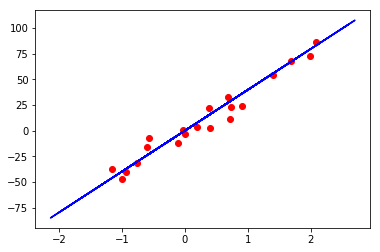

In [15]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.show()